#### Amazinum. Task 13. Apriori. Moisei

Постійно викидало помилку: apriori() got an unexpected keyword argument 'min_confidence'. Досі не знаю чим вона викликається. Файли з помилкою прикріплено.

Loading Necessary Packages

In [2]:
import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting

Loading dataset

In [3]:
df = pd.read_csv("Groceries_dataset.csv") ## Loading dataset
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.info() # Checking data type information for validation purposes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.isnull().sum().sort_values(ascending=False) ## Checking availability of NULL values

Member_number      0
Date               0
itemDescription    0
dtype: int64

Data Pre-Processing

In [6]:
df['Date'] = pd.to_datetime(df['Date']) ## Type-Conversion from Object to Dateime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [7]:
df.head() ## Schema check

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


Top 10 Sold Items

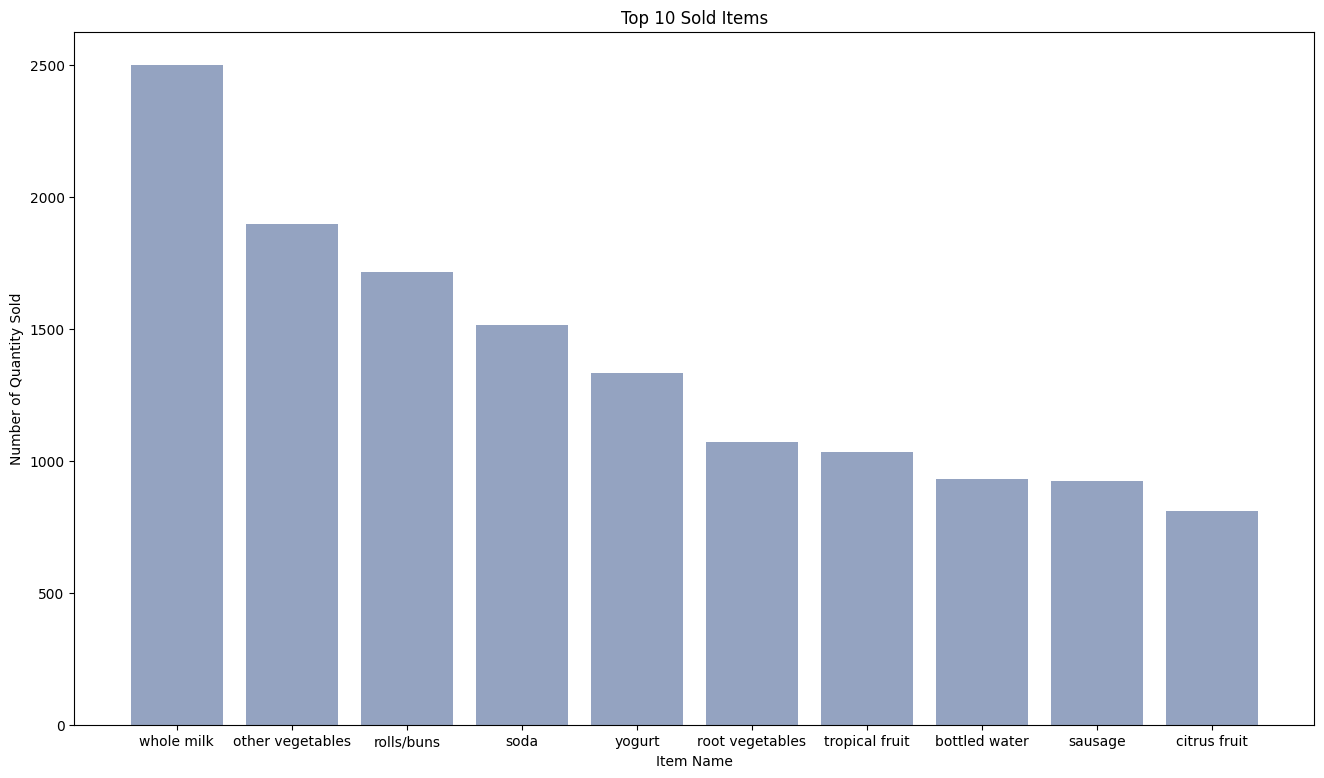

In [8]:
## Creating distribution of Item Sold

Item_distr = df.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

## Declaring variables

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size

plt.figure(figsize=(16,9))

# Create bars
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

Month-Year Sales

In [9]:
df_date=df.set_index(['Date']) ## Setting date as index for plotting purpose
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


Visualize sales by month

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

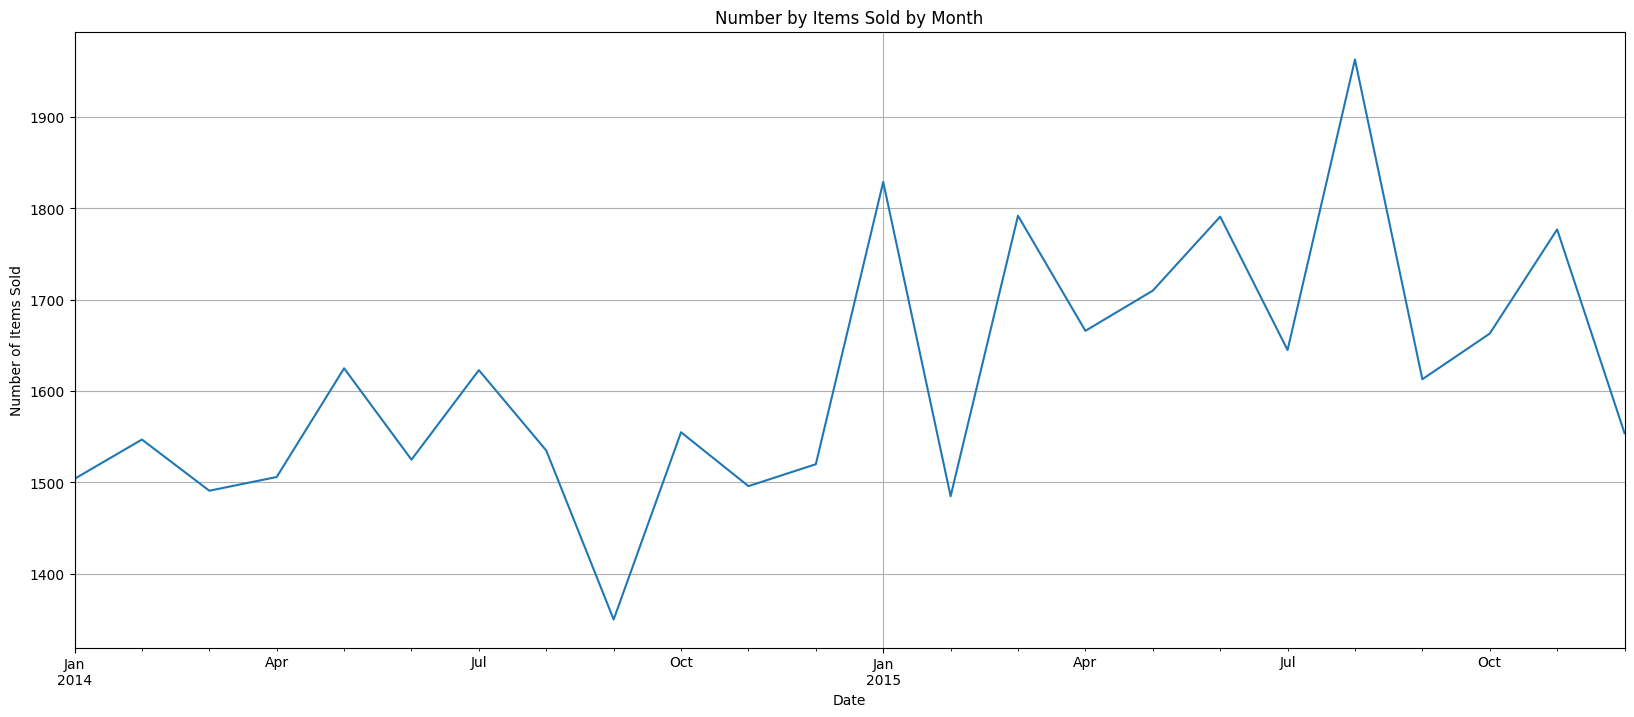

In [10]:
df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

Apriori Implementation

Data Preparation

In [11]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False) ## Selecting only required variables for modelling
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip() # Removing white spaces if any
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


Create Transaction list

In [12]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))] ## Combing all the items in list format for each cutomer

Train Model

In [86]:
from apyori import apriori ## Importing apriori package
rules = apriori(transactions = transactions, min_support = 0.0002, min_confidence = 0.2, min_lift = 2, min_length = 2, max_length = 2) ## Model Creation

In [87]:
results = list(rules) ## Storing results in list format for better visualisation

In [88]:
results

[RelationRecord(items=frozenset({'margarine', 'Instant food products'}), support=0.0038481272447408927, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'margarine'}), confidence=0.25, lift=2.137061403508772)]),
 RelationRecord(items=frozenset({'bags', 'UHT-milk'}), support=0.0002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bags'}), items_add=frozenset({'UHT-milk'}), confidence=0.25, lift=3.184640522875817)]),
 RelationRecord(items=frozenset({'UHT-milk', 'honey'}), support=0.0007696254489481786, ordered_statistics=[OrderedStatistic(items_base=frozenset({'honey'}), items_add=frozenset({'UHT-milk'}), confidence=0.23076923076923078, lift=2.939668174962293)]),
 RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift

In [89]:
len(results)

244

Print rules with more details

In [90]:
def print_rules(rules):
    for rule in rules:
        print ('rule.items=', list(rule.items))
        print ('rule.support=',rule.support)

        for os in rule.ordered_statistics:
            print ('\titems_base=', list(os.items_base))
            print ('\tlifted_item =', list(os.items_add))
            print ('\tlift=', os.lift)
            print ('\tconfidence (i.e. cond prob {} if {})='.format(list(os.items_add), list(os.items_base)), os.confidence)
            print ('\n')
        
print_rules(rules)

Result Customization

In [91]:
## Creating user-defined function for arranging the results obtained from model into readable format

def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
FinalResult = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])
FinalResult

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,Instant food products,margarine,0.003848,0.250000,2.137061
1,bags,UHT-milk,0.000257,0.250000,3.184641
2,honey,UHT-milk,0.000770,0.230769,2.939668
3,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
4,rice,UHT-milk,0.002822,0.224490,2.859677
...,...,...,...,...,...
239,sparkling wine,waffles,0.002565,0.217391,3.150154
240,whisky,specialty chocolate,0.000513,0.250000,4.274123
241,toilet cleaner,waffles,0.000513,0.400000,5.796283
242,toilet cleaner,whipped/sour cream,0.000513,0.400000,2.585738


In [92]:
len(FinalResult)

244

Top 10 association rules worth recommending

In [93]:
FinalResult.nlargest(n=10, columns="Lift") ## Showing 10 best possible scenarios

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
224,preservation products,soups,0.000257,1.000000,81.208333
23,baby cosmetics,skin care,0.000257,0.333333,64.966667
190,kitchen utensil,roll products,0.000257,1.000000,48.725000
6,baby cosmetics,artif. sweetener,0.000257,0.333333,44.804598
85,kitchen utensil,canned fish,0.000257,1.000000,33.895652
187,kitchen utensil,pasta,0.000257,1.000000,33.033898
189,kitchen utensil,processed cheese,0.000257,1.000000,25.986667
29,bags,female sanitary products,0.000257,0.250000,24.362500
35,bags,liver loaf,0.000257,0.250000,20.302083
80,salad dressing,candles,0.000513,0.333333,19.686869
